In [2]:
import pandas as pd
import sweetviz
import numpy as np

In [104]:
merged=pd.read_csv('subscribers_cleaned.csv')
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227628 entries, 0 to 227627
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   subid                         227628 non-null  int64  
 1   package_type                  192054 non-null  object 
 2   num_weekly_services_utilized  117178 non-null  float64
 3   preferred_genre               191302 non-null  object 
 4   intended_use                  224079 non-null  object 
 5   weekly_consumption_hour       189698 non-null  float64
 6   num_ideal_streaming_services  115458 non-null  float64
 7   age                           192335 non-null  float64
 8   male_TF                       227359 non-null  object 
 9   country                       227628 non-null  object 
 10  attribution_technical         227628 non-null  object 
 11  attribution_survey            224984 non-null  object 
 12  op_sys                        214253 non-nul

In [105]:
merged.head()

subid package_type  num_weekly_services_utilized preferred_genre  \
0  21724479      economy                           NaN          comedy   
1  23383224         base                           NaN          comedy   
2  26844789     enhanced                           3.0        regional   
3  29417030         base                           NaN           drama   
4  26723159         base                           4.0          comedy   

                  intended_use  weekly_consumption_hour  \
0  access to exclusive content                      NaN   
1  access to exclusive content                22.951579   
2                  replace OTT                36.001186   
3                  replace OTT                20.051667   
4                  replace OTT                22.951579   

   num_ideal_streaming_services   age male_TF country attribution_technical  \
0                           NaN   NaN   False     UAE              facebook   
1                           NaN  70.0   False     UAE              facebook   
2                           2.0  25.0    True     UAE               organic   
3                           NaN  30.0   False     UAE                search   
4                           3.0  28.0   False     UAE             discovery   

  attribution_survey   op_sys  months_per_bill_period              plan_type  \
0           facebook  Android                       4  base_uae_14_day_trial   
1           facebook      NaN                       4  base_uae_14_day_trial   
2           facebook      iOS                       4  base_uae_14_day_trial   
3                 tv  Android                       4  base_uae_14_day_trial   
4            youtube      iOS                       4  base_uae_14_day_trial   

   monthly_price  discount_price account_creation_date    trial_end_date  \
0         4.7343          4.5141       2020/1/24 21:44    2020/2/7 21:44   
1         4.7343          4.5141        2020/3/1 15:44   2020/3/15 15:44   
2         4.7343          4.5141       2019/12/7 16:37  2019/12/21 16:37   
3         4.7343          4.5141       2020/1/27 16:09   2020/2/10 16:09   
4         4.7343          4.5141       2019/10/5 12:57  2019/10/19 12:57   

   initial_credit_card_declined  join_fee language      payment_type  \
0                         False       NaN       ar  Standard Charter   
1                         False    0.3303       ar               NaN   
2                         False    0.1101       ar               NaN   
3                         False    0.0367       ar               NaN   
4                         False    0.0367       ar               NaN   

   num_trial_days  current_sub_TF  payment_period     last_payment  \
0              14            True               1   2020/2/7 21:44   
1              14            True               1  2020/3/15 15:44   
2              14           False               0              NaN   
3              14           False               0              NaN   
4              14            True               2  2020/2/19 12:57   

      next_payment cancel_date  trial_completed  
0   2020/6/7 21:44         NaN             True  
1  2020/7/15 15:44         NaN             True  
2              NaN         NaN             True  
3              NaN         NaN             True  
4  2020/6/19 12:57         NaN             True

In [78]:
merged['churn']=merged['current_sub_TF'].apply(lambda x: 1 if x == False else 0)

In [ ]:
##Choose features by choice, Highly correlated features are dropped (keep one feature)
#Date variables are dropped, replaced with calculated variables
#Features with high missing values (>30%) are dropped


In [383]:
merged_sub=merged[['subid','current_sub_TF']]

In [79]:
merged_segment=merged[['subid','intended_use','male_TF',
                        'attribution_survey','op_sys','weekly_consumption_hour',
                       'preferred_genre','package_type','age','payment_period']]

In [80]:
merged_segment.head()

subid                 intended_use male_TF attribution_survey   op_sys  \
0  21724479  access to exclusive content   False           facebook  Android   
1  23383224  access to exclusive content   False           facebook      NaN   
2  26844789                  replace OTT    True           facebook      iOS   
3  29417030                  replace OTT   False                 tv  Android   
4  26723159                  replace OTT   False            youtube      iOS   

   weekly_consumption_hour preferred_genre package_type   age  payment_period  
0                      NaN          comedy      economy   NaN               1  
1                22.951579          comedy         base  70.0               1  
2                36.001186        regional     enhanced  25.0               0  
3                20.051667           drama         base  30.0               0  
4                22.951579          comedy         base  28.0               2

In [81]:
merged_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227628 entries, 0 to 227627
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   subid                    227628 non-null  int64  
 1   intended_use             224079 non-null  object 
 2   male_TF                  227359 non-null  object 
 3   attribution_survey       224984 non-null  object 
 4   op_sys                   214253 non-null  object 
 5   weekly_consumption_hour  189698 non-null  float64
 6   preferred_genre          191302 non-null  object 
 7   package_type             192054 non-null  object 
 8   age                      192335 non-null  float64
 9   payment_period           227628 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 17.4+ MB


In [82]:
merged_segment.isnull().sum()

subid                          0
intended_use                3549
male_TF                      269
attribution_survey          2644
op_sys                     13375
weekly_consumption_hour    37930
preferred_genre            36326
package_type               35574
age                        35293
payment_period                 0
dtype: int64

In [83]:
# fill in some of the missing values with proportional sampling 
def proportional_fillna(df,col):
    s = df[col].value_counts(normalize=True)
    missing = df[col].isnull()
    df.loc[missing,col] = np.random.choice(s.index, size=len(df[missing]),p=s.values)
    return df

In [84]:
# apply the proportional fillna function
proportional_fillna(merged_segment,'preferred_genre')
proportional_fillna(merged_segment,'intended_use')
proportional_fillna(merged_segment,'attribution_survey')
proportional_fillna(merged_segment,'op_sys')
proportional_fillna(merged_segment,'package_type')


/Users/jayjohnnyjay/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


subid                 intended_use male_TF attribution_survey  \
0       21724479  access to exclusive content   False           facebook   
1       23383224  access to exclusive content   False           facebook   
2       26844789                  replace OTT    True           facebook   
3       29417030                  replace OTT   False                 tv   
4       26723159                  replace OTT   False            youtube   
...          ...                          ...     ...                ...   
227623  21434712               supplement OTT   False   facebook_organic   
227624  25843074                  replace OTT   False           referral   
227625  24799085  access to exclusive content   False           facebook   
227626  21308040  access to exclusive content   False           facebook   
227627  20166335                  replace OTT   False                 tv   

         op_sys  weekly_consumption_hour preferred_genre package_type   age  \
0       Android                      NaN          comedy      economy   NaN   
1           iOS                22.951579          comedy         base  70.0   
2           iOS                36.001186        regional     enhanced  25.0   
3       Android                20.051667           drama         base  30.0   
4           iOS                22.951579          comedy         base  28.0   
...         ...                      ...             ...          ...   ...   
227623      iOS                28.751405          comedy     enhanced  38.0   
227624      iOS                27.301448          comedy     enhanced  49.0   
227625      iOS                31.651317          comedy         base  45.0   
227626      iOS                      NaN          comedy         base   NaN   
227627      iOS                25.851492          comedy         base  55.0   

        payment_period  
0                    1  
1                    1  
2                    0  
3                    0  
4                    2  
...                ...  
227623               1  
227624               1  
227625               1  
227626               1  
227627               0  

[227628 rows x 10 columns]

In [85]:
merged_segment.isnull().sum()

subid                          0
intended_use                   0
male_TF                      269
attribution_survey             0
op_sys                         0
weekly_consumption_hour    37930
preferred_genre                0
package_type                   0
age                        35293
payment_period                 0
dtype: int64

In [86]:
merged_segment.dropna(subset=['age'],inplace=True)

/Users/jayjohnnyjay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
merged_segment.dropna(subset=['weekly_consumption_hour'],inplace=True)

/Users/jayjohnnyjay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [88]:
merged_segment.isnull().sum()

subid                      0
intended_use               0
male_TF                    3
attribution_survey         0
op_sys                     0
weekly_consumption_hour    0
preferred_genre            0
package_type               0
age                        0
payment_period             0
dtype: int64

In [89]:
merged_segment.dropna(subset=['male_TF'],inplace=True)

/Users/jayjohnnyjay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
merged_segment.isnull().sum()

subid                      0
intended_use               0
male_TF                    0
attribution_survey         0
op_sys                     0
weekly_consumption_hour    0
preferred_genre            0
package_type               0
age                        0
payment_period             0
dtype: int64

In [91]:
# drop the num of trial days column, plan type, billing channel, and contact frequency
#df_segmentation_cleaned = merged_segment.drop(['plan_type_clean','attribution_technical'],axis=1)
df_segmentation_cleaned = merged_segment

In [92]:
# save to file for further processing
df_segmentation_cleaned.to_csv('df_segmentation_cleaned.csv')

## Segmentation

In [93]:
df_segmentation_cleaned = pd.read_csv('df_segmentation_cleaned.csv',index_col=0)

In [94]:
df_segmentation_cleaned['payment_period'] = df_segmentation_cleaned.payment_period.astype('category')

In [95]:
df_segmentation_cleaned.info() # need to find things that are stable
                            # don't use engagement data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 189571 entries, 1 to 227627
Data columns (total 10 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   subid                    189571 non-null  int64   
 1   intended_use             189571 non-null  object  
 2   male_TF                  189571 non-null  bool    
 3   attribution_survey       189571 non-null  object  
 4   op_sys                   189571 non-null  object  
 5   weekly_consumption_hour  189571 non-null  float64 
 6   preferred_genre          189571 non-null  object  
 7   package_type             189571 non-null  object  
 8   age                      189571 non-null  float64 
 9   payment_period           189571 non-null  category
dtypes: bool(1), category(1), float64(2), int64(1), object(5)
memory usage: 13.4+ MB


In [96]:
df_segmentation_no_id=df_segmentation_cleaned.loc[:,df_segmentation_cleaned.columns!='subid']

In [67]:
def preprocess(X):
    """
    Takes in datframe, 
    and returns a cleaned and standardized dataframe
    Feed into model directly
    """

    # scale data 
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    
    return(X)

In [97]:
# Transform categorical variables into dummy variables
df_segmentation_no_id_dummies = pd.get_dummies(df_segmentation_no_id)

In [98]:
X = preprocess(df_segmentation_no_id_dummies)

In [70]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import mixture 

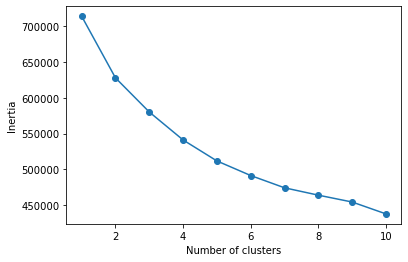

In [99]:
# Decide the best k: inertia criterion
inertia = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    inertia.append(km.inertia_)

# plot
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [100]:
# Clustering model
kmeans = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=777)
cluster_kmeans = kmeans.fit_predict(X)


In [101]:
#append cluster labels to dataset
df_segmentation_no_id_dummies['cluster_kmeans']=cluster_kmeans
df_segmentation_cleaned['cluster_kmeans']=cluster_kmeans


In [378]:
# check cluster proportions - train 
for i in [0,1,2]:
    print("Cluster {} is {:.2f}%".format(i, 100*df_segmentation_cleaned['cluster_kmeans'].value_counts()[i]/len(df_segmentation_cleaned)))

Cluster 0 is 36.43%
Cluster 1 is 34.74%
Cluster 2 is 28.83%


In [394]:
# check out the clusters in training set
pd.set_option('display.max_columns', None)
cluster_details=df_segmentation_no_id_dummies.groupby(by='cluster_kmeans').mean()
cluster_details.to_csv('cluster_details.csv')

In [380]:
df_segmentation_cleaned.head()

subid                 intended_use  male_TF attribution_survey   op_sys  \
1  23383224  access to exclusive content    False           facebook      iOS   
2  26844789                  replace OTT     True           facebook      iOS   
3  29417030                  replace OTT    False                 tv  Android   
4  26723159                  replace OTT    False            youtube      iOS   
5  24810928  access to exclusive content    False                 tv  Android   

   weekly_consumption_hour preferred_genre package_type   age payment_period  \
1                22.951579          comedy         base  70.0              1   
2                36.001186        regional     enhanced  25.0              0   
3                20.051667           drama         base  30.0              0   
4                22.951579          comedy         base  28.0              2   
5                20.051667          comedy         base  70.0              1   

   cluster_kmeans  
1               0  
2               2  
3               1  
4               0  
5               1

In [384]:
df_segmentation_cleaned_sub=df_segmentation_cleaned.merge(merged_sub,left_on='subid',right_on='subid',how='left')

In [385]:
df_segmentation_cleaned_sub.head()

subid                 intended_use  male_TF attribution_survey   op_sys  \
0  23383224  access to exclusive content    False           facebook      iOS   
1  26844789                  replace OTT     True           facebook      iOS   
2  29417030                  replace OTT    False                 tv  Android   
3  26723159                  replace OTT    False            youtube      iOS   
4  24810928  access to exclusive content    False                 tv  Android   

   weekly_consumption_hour preferred_genre package_type   age payment_period  \
0                22.951579          comedy         base  70.0              1   
1                36.001186        regional     enhanced  25.0              0   
2                20.051667           drama         base  30.0              0   
3                22.951579          comedy         base  28.0              2   
4                20.051667          comedy         base  70.0              1   

   cluster_kmeans  current_sub_TF  
0               0            True  
1               2           False  
2               1           False  
3               0            True  
4               1            True

In [388]:
# save to file for further processing
df_segmentation_cleaned_sub.to_csv('segmentation_results_new.csv')

# Churn Model

-we neglect users who are still in trial period

I define churn when:
 - paymen_period=0 & current_sub_TF=False & Cancel_date=null
 - paymen_period=0 & current_sub_TF=False & Cancel_date!=null
 
non churn as:
 - users with payment_period>=1
 

In [106]:
# remember to scale features
import datetime

In [107]:
# save to file for further processing
merged.to_csv('churn_data.csv')

In [108]:
churn_df=pd.read_csv('churn_data.csv',index_col=0)

In [109]:
churn_df['account_creation_date'] = pd.to_datetime(churn_df['account_creation_date'])

In [110]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227628 entries, 0 to 227627
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subid                         227628 non-null  int64         
 1   package_type                  192054 non-null  object        
 2   num_weekly_services_utilized  117178 non-null  float64       
 3   preferred_genre               191302 non-null  object        
 4   intended_use                  224079 non-null  object        
 5   weekly_consumption_hour       189698 non-null  float64       
 6   num_ideal_streaming_services  115458 non-null  float64       
 7   age                           192335 non-null  float64       
 8   male_TF                       227359 non-null  object        
 9   country                       227628 non-null  object        
 10  attribution_technical         227628 non-null  object        
 11  attribution_s

In [111]:
#define churn/not churn
def churn(row):
    if row.payment_period== 0 and row.current_sub_TF==False:
        return 1
    elif row.payment_period== 0 and pd.isna(row.cancel_date):
        return 1
    elif row.payment_period>=1:
        return 0
    else:
        return 0

In [112]:
churn_df['churn'] = churn_df.apply(churn,axis=1)

In [113]:
churn_df['churn'].value_counts()

0    133133
1     94495
Name: churn, dtype: int64

In [114]:
churn_df['num_trial_days'].value_counts(dropna=False)

14    227458
0        170
Name: num_trial_days, dtype: int64

In [115]:
#remove users who are still in trial
churn_df=churn_df[~((churn_df['payment_period']!=0) & (churn_df['current_sub_TF']!=True))]

In [116]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216791 entries, 0 to 227627
Data columns (total 31 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   subid                         216791 non-null  int64         
 1   package_type                  185225 non-null  object        
 2   num_weekly_services_utilized  111399 non-null  float64       
 3   preferred_genre               184469 non-null  object        
 4   intended_use                  213445 non-null  object        
 5   weekly_consumption_hour       180429 non-null  float64       
 6   num_ideal_streaming_services  109797 non-null  float64       
 7   age                           182894 non-null  float64       
 8   male_TF                       216522 non-null  object        
 9   country                       216791 non-null  object        
 10  attribution_technical         216791 non-null  object        
 11  attribution_s

In [117]:
churn_df.to_csv('churn_data_raw.csv')

In [118]:
# change date columns to datetime format
churn_df['cancel_date'] = pd.to_datetime(churn_df['cancel_date'])
churn_df['next_payment'] = pd.to_datetime(churn_df['next_payment'])
churn_df['last_payment'] = pd.to_datetime(churn_df['last_payment'])
churn_df['account_creation_date'] = pd.to_datetime(churn_df['account_creation_date'])
churn_df['trial_end_date'] = pd.to_datetime(churn_df['trial_end_date'])

##### Additional Cleaning

1. Keep only the relevant columns
    - Columns with too much missing values are dropped(>30%)
    - Date columns are dropped
2. Too many unique values in plan type
    - Change to Base, High and Low

In [119]:
churn_df.isnull().sum()

subid                                0
package_type                     31566
num_weekly_services_utilized    105392
preferred_genre                  32322
intended_use                      3346
weekly_consumption_hour          36362
num_ideal_streaming_services    106994
age                              33897
male_TF                            269
country                              0
attribution_technical                0
attribution_survey                2461
op_sys                           12791
months_per_bill_period               0
plan_type                            0
monthly_price                        0
discount_price                       0
account_creation_date                0
trial_end_date                       0
initial_credit_card_declined         0
join_fee                         33514
language                             0
payment_type                    128948
num_trial_days                       0
current_sub_TF                       0
payment_period           

In [120]:
churn_cols = ['subid','age',
       'num_trial_days',
       'preferred_genre', 'weekly_consumption_hour','package_type','intended_use',
       'male_TF', 'attribution_technical', 'op_sys',
       'initial_credit_card_declined','churn']

In [121]:
churn_df[churn_cols].isnull().sum()

subid                               0
age                             33897
num_trial_days                      0
preferred_genre                 32322
weekly_consumption_hour         36362
package_type                    31566
intended_use                     3346
male_TF                           269
attribution_technical               0
op_sys                          12791
initial_credit_card_declined        0
churn                               0
dtype: int64

In [122]:
# only keep the relevant columns
churn_df_clean =  churn_df[churn_cols]

In [123]:
# apply the proportional fillna function
proportional_fillna(churn_df_clean,'preferred_genre')
proportional_fillna(churn_df_clean,'intended_use')
proportional_fillna(churn_df_clean,'op_sys')
proportional_fillna(churn_df_clean,'male_TF')
proportional_fillna(churn_df_clean,'package_type')


/Users/jayjohnnyjay/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


subid   age  num_trial_days preferred_genre  \
0       21724479   NaN              14          comedy   
1       23383224  70.0              14          comedy   
2       26844789  25.0              14        regional   
3       29417030  30.0              14           drama   
4       26723159  28.0              14          comedy   
...          ...   ...             ...             ...   
227623  21434712  38.0              14          comedy   
227624  25843074  49.0              14          comedy   
227625  24799085  45.0              14          comedy   
227626  21308040   NaN              14          comedy   
227627  20166335  55.0              14          comedy   

        weekly_consumption_hour package_type                 intended_use  \
0                           NaN      economy  access to exclusive content   
1                     22.951579         base  access to exclusive content   
2                     36.001186     enhanced                  replace OTT   
3                     20.051667         base                  replace OTT   
4                     22.951579         base                  replace OTT   
...                         ...          ...                          ...   
227623                28.751405     enhanced               supplement OTT   
227624                27.301448     enhanced                  replace OTT   
227625                31.651317         base  access to exclusive content   
227626                      NaN         base  access to exclusive content   
227627                25.851492         base                  replace OTT   

       male_TF attribution_technical   op_sys  initial_credit_card_declined  \
0        False              facebook  Android                         False   
1        False              facebook      iOS                         False   
2         True               organic      iOS                         False   
3        False                search  Android                         False   
4        False             discovery      iOS                         False   
...        ...                   ...      ...                           ...   
227623   False              facebook      iOS                         False   
227624   False        google_organic      iOS                         False   
227625   False              facebook      iOS                          True   
227626   False              facebook      iOS                         False   
227627   False               organic      iOS                         False   

        churn  
0           0  
1           0  
2           1  
3           1  
4           0  
...       ...  
227623      0  
227624      0  
227625      0  
227626      0  
227627      1  

[216791 rows x 12 columns]

In [124]:
# drop na
churn_df_clean.dropna(inplace=True)
churn_df_clean.isnull().sum() #exclude current_sub_TF

/Users/jayjohnnyjay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


subid                           0
age                             0
num_trial_days                  0
preferred_genre                 0
weekly_consumption_hour         0
package_type                    0
intended_use                    0
male_TF                         0
attribution_technical           0
op_sys                          0
initial_credit_card_declined    0
churn                           0
dtype: int64

In [125]:
churn_df_clean.shape

(180311, 12)

In [126]:
churn_df_clean['churn'].value_counts()

0    98062
1    82249
Name: churn, dtype: int64

So in our churn model, we will focus on the subset of people (180311 unique subids) that completed trial and went on to period 1.

Next, I am going to prepare the rest of the variables for these people.

In [700]:
# clean plan type to only base high and low 
#churn_df_clean['plan_type'] = churn_df['plan_type'].apply(lambda x: x.split('_')[0])

In [127]:
# save to file for further processing
churn_df_clean.to_csv('churn_cleaned.csv')

In [128]:
churn_df_clean.shape

(180311, 12)

#### Modeling

I will try out decision tree and logistics regression, and both use gridsearch to optimize modeling parameters.

In [129]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import RandomForestRegressor # Import Random Forest Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [183]:
X_dummies = pd.get_dummies(churn_df_clean.drop(['subid','churn'],axis=1),drop_first=True) # Features
column_names=X_dummies.columns
y = churn_df_clean[['subid','churn']] # Target variable
y.set_index('subid', inplace=True)

In [184]:
y

churn
subid          
23383224      0
26844789      1
29417030      1
26723159      0
24810928      0
...         ...
25835684      0
21434712      0
25843074      0
24799085      0
20166335      1

[180311 rows x 1 columns]

In [185]:
X_dummies.shape

(180311, 50)

In [186]:
X_dummies_scaled=preprocess(X_dummies)

In [187]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_dummies_scaled, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [135]:
# use gridsearch to optimize performance
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': np.arange(3, 12),'max_features':np.arange(2,50)}


tree = GridSearchCV(DecisionTreeClassifier(), param_grid)

tree.fit(X_train, y_train)
tree_preds = tree.predict_proba(X_test)[:, 1]
tree_performance = roc_auc_score(y_test, tree_preds)

print(tree.best_params_)
print ('DecisionTree: Area under the ROC curve = {}'.format(tree_performance))

{'max_depth': 11, 'max_features': 47}
DecisionTree: Area under the ROC curve = 0.8410706913498667


In [148]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=11,max_features=47)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_tree = clf.predict(X_test)

In [147]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))

Accuracy: 0.7743372647613413


In [149]:
roc_auc_score(y_test, tree_preds)

0.8410706913498667

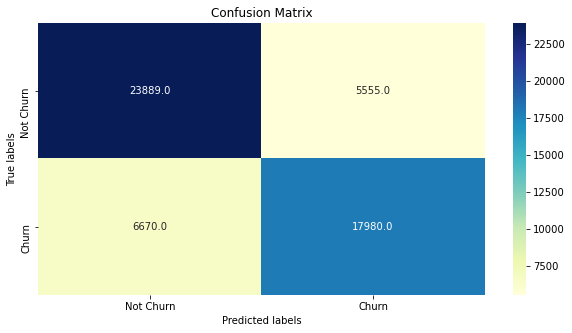

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt     

plt.figure(figsize=(10, 5))
ax= plt.subplot()

cm = metrics.confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cm, annot=True, ax = ax,fmt='.1f',cmap="YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Churn', 'Churn']); ax.yaxis.set_ticklabels(['Not Churn', 'Churn']);

In [151]:
print("Recall {}".format(cm[1,1]/y_test.sum()))
print("Precision {}".format(cm[1,1]/y_pred_tree.sum()))

Recall 0.7294117647058823
Precision 0.7639685574676014


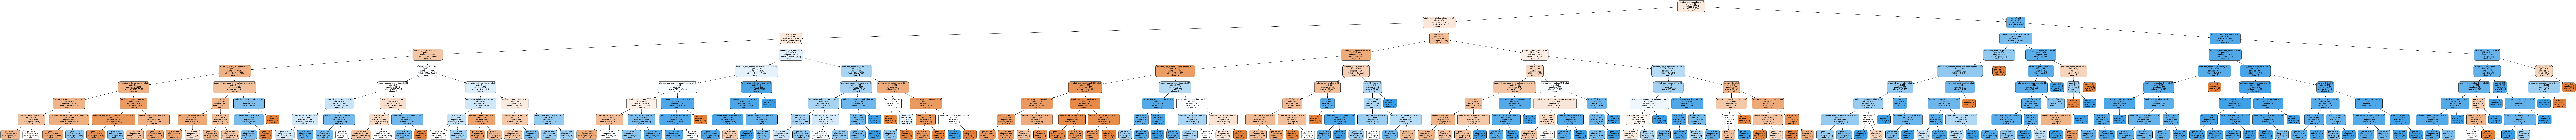

In [905]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Churn.png')
Image(graph.create_png())

In [152]:
# check feature importance
X_train_features=X_dummies
for importance, name in sorted(zip(clf.feature_importances_, X_train_features.columns),reverse=True)[:5]:
    print (name, importance)

intended_use_expand international access 0.18202046134960598
age 0.1630030818665979
intended_use_expand regional access 0.1551981587252718
intended_use_replace OTT 0.1118989328023954
intended_use_education 0.08451231746651582


## Logistic Regression

In [153]:
from sklearn.linear_model import LogisticRegression

In [682]:
# optimize performance using gridsearch
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

/Users/jayjohnnyjay/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jayjohnnyjay/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jayjohnnyjay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/jayjohnnyjay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/jayjohnnyjay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.

/Users/jayjohnnyjay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/jayjohnnyjay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

/Users/jayjohnnyjay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/jayjohnnyjay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

/Users/jayjohnnyjay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/jayjohnnyjay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

/Users/jayjohnnyjay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/jayjohnnyjay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

/Users/jayjohnnyjay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/jayjohnnyjay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.754980179055477


/Users/jayjohnnyjay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [188]:
logisticRegr = LogisticRegression(C=1000,penalty='l2')

In [189]:
logisticRegr.fit(X_train, y_train)
predictions = logisticRegr.predict(X_test)
predictions_proba=logisticRegr.predict_proba(X_test)[:,1]

/Users/jayjohnnyjay/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/jayjohnnyjay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [190]:
logisticRegr.score(X_test, y_test)

0.7860576034310645

In [191]:
metrics.confusion_matrix(y_test, predictions)

array([[24103,  5341],
       [ 6232, 18418]])

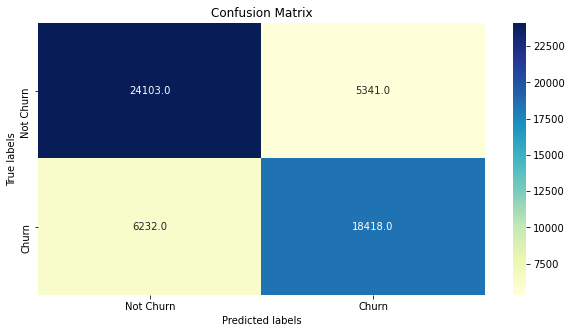

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt     

plt.figure(figsize=(10, 5))
ax= plt.subplot()

cm = metrics.confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, ax = ax,fmt='.1f',cmap="YlGnBu"); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Not Churn', 'Churn']); ax.yaxis.set_ticklabels(['Not Churn', 'Churn']);

In [192]:
print("Recall {}".format(cm[1,1]/y_test.sum()))
print("Precision {}".format(cm[1,1]/y_pred_tree.sum()))

Recall churn    0.747181
dtype: float64
Precision 0.7825791374548545


In [193]:
LR_performance = roc_auc_score(y_test, predictions_proba)
LR_performance

0.857765350555102

<Figure size 432x288 with 0 Axes>

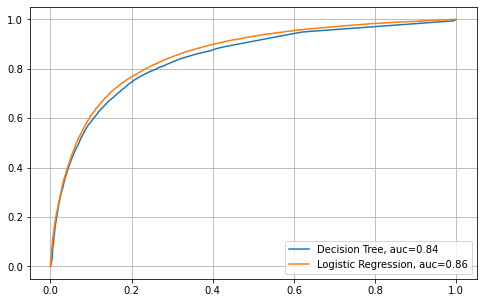

In [194]:

plt.figure(0).clf()
plt.figure(figsize=(8,5))

pred = np.random.rand(1000)
label = np.random.randint(2, size=1000)
fpr, tpr, thresh = metrics.roc_curve(y_test, tree_preds)
auc = metrics.roc_auc_score(y_test, tree_preds)
plt.plot(fpr,tpr,label="Decision Tree, auc="+str((round(auc,2))))

pred = np.random.rand(1000)
label = np.random.randint(2, size=1000)
fpr, tpr, thresh = metrics.roc_curve(y_test, predictions_proba)
auc = metrics.roc_auc_score(y_test, predictions_proba)
plt.plot(fpr,tpr,label="Logistic Regression, auc="+str((round(auc,2))))

plt.grid(b=None)
plt.legend(loc=0)

## Revenue Modelling

In [ ]:
#use people in still in trial period to do predict whether or not they will churn, don't include in training set
#use these 8850 people to do revenue modelling analysis?

In [256]:
# prepare predicted probabilities and actual labels
rev_model_1 = pd.DataFrame(data = logisticRegr.predict_proba(X_dummies_scaled)).join(pd.DataFrame(y).reset_index())
rev_model_1

0         1     subid  churn
0       0.595652  0.404348  23383224      0
1       0.353625  0.646375  26844789      1
2       0.217632  0.782368  29417030      1
3       0.590639  0.409361  26723159      0
4       0.627045  0.372955  24810928      0
...          ...       ...       ...    ...
180306  0.635370  0.364630  25835684      0
180307  0.940250  0.059750  21434712      0
180308  0.460439  0.539561  25843074      0
180309  0.917184  0.082816  24799085      0
180310  0.258839  0.741161  20166335      1

[180311 rows x 4 columns]

In [241]:
#rev_model_1 = rev_model_1.merge(merged_period1['subid'].reset_index(),on='index')

In [257]:
rev_model_1 = rev_model_1[['subid','churn',1]].rename(columns={'churn':'Actual',1:'Predicted_Churn'})

In [258]:
rev_model_1.head()

subid  Actual  Predicted_Churn
0  23383224       0         0.404348
1  26844789       1         0.646375
2  29417030       1         0.782368
3  26723159       0         0.409361
4  24810928       0         0.372955

In [259]:
cluster_labels=df_segmentation_cleaned[['subid','cluster_kmeans']]

In [260]:
# merge the cluster labels into the revenue model df
rev_model_1 = rev_model_1.merge(cluster_labels,left_on='subid',right_on='subid',how='left')

In [261]:
rev_model_1.rename(columns={'cluster_kmeans':'cluster_label'}, inplace=True)
rev_model_1

subid  Actual  Predicted_Churn  cluster_label
0       23383224       0         0.404348            0.0
1       26844789       1         0.646375            2.0
2       29417030       1         0.782368            1.0
3       26723159       0         0.409361            0.0
4       24810928       0         0.372955            1.0
...          ...     ...              ...            ...
180306  25835684       0         0.364630            0.0
180307  21434712       0         0.059750            0.0
180308  25843074       0         0.539561            0.0
180309  24799085       0         0.082816            0.0
180310  20166335       1         0.741161            2.0

[180311 rows x 4 columns]

In [262]:
def get_offer(pred,threshold):
    if pred > threshold:
        return 1
    else: 
        return 0

In [263]:
import random

def accept_offer(get_offer, acceptance_rate):
    if get_offer == 1: # if given an offer
        if random.random() <= acceptance_rate: 
            return 1 # accept offer at acceptance rate 
        else: 
            return 0 # turn down offer
    else: 
        return 0 # if not offered

In [264]:
# get predictions based on three diff thresholds
rev_model_1['pred_threshold = 50%'] = rev_model_1['Predicted_Churn'].apply(lambda x: get_offer(x,.5))
rev_model_1['pred_threshold = 66.7%'] = rev_model_1['Predicted_Churn'].apply(lambda x: get_offer(x,0.667))
rev_model_1['pred_threshold = 90%'] = rev_model_1['Predicted_Churn'].apply(lambda x: get_offer(x,.9))

In [267]:
def accept_offer_1(row):
    # set acceptance rate
    if row.cluster_label == 0:
        acceptance_rate = .1
    elif row.cluster_label == 1:
        acceptance_rate = .2
    else:
        acceptance_rate = .3        
    if row['pred_threshold = 50%'] == 1: # if we make an offer
        if random.random() <= acceptance_rate:
            return 1 
        else: return 0
    else: return 0
    
    
def accept_offer_2(row):
    # set acceptance rate
    if row.cluster_label == 0:
        acceptance_rate = .1
    elif row.cluster_label == 1:
        acceptance_rate = .2
    else:
        acceptance_rate = .3
        
    if row['pred_threshold = 66.7%'] == 1: # if we make an offer
        if random.random() <= acceptance_rate: 
            return 1 # label as 1
        else: return 0      
    else: return 0
    
def accept_offer_3(row):
    # set acceptance rate
    if row.cluster_label == 0:
        acceptance_rate = .1
    elif row.cluster_label == 1:
        acceptance_rate = .2
    else:
        acceptance_rate = .3        
    if row['pred_threshold = 90%'] == 1: # if we make an offer
        if random.random() <= acceptance_rate: 
            return 1 # label as 1
        else: return 0        
    else: return 0

In [268]:
# get the accept offer columns
rev_model_1['Accept_50%'] = rev_model_1.apply(accept_offer_1,axis=1)
rev_model_1['Accept_66.7%'] = rev_model_1.apply(accept_offer_2,axis=1)
rev_model_1['Accept_90%'] = rev_model_1.apply(accept_offer_3,axis=1)

In [269]:
rev_model_1

subid  Actual  Predicted_Churn  cluster_label  \
0       23383224       0         0.404348            0.0   
1       26844789       1         0.646375            2.0   
2       29417030       1         0.782368            1.0   
3       26723159       0         0.409361            0.0   
4       24810928       0         0.372955            1.0   
...          ...     ...              ...            ...   
180306  25835684       0         0.364630            0.0   
180307  21434712       0         0.059750            0.0   
180308  25843074       0         0.539561            0.0   
180309  24799085       0         0.082816            0.0   
180310  20166335       1         0.741161            2.0   

        pred_threshold = 50%  pred_threshold = 66.7%  pred_threshold = 90%  \
0                          0                       0                     0   
1                          1                       0                     0   
2                          1                       1                     0   
3                          0                       0                     0   
4                          0                       0                     0   
...                      ...                     ...                   ...   
180306                     0                       0                     0   
180307                     0                       0                     0   
180308                     1                       0                     0   
180309                     0                       0                     0   
180310                     1                       1                     0   

        Accept_50%  Accept_66.7%  Accept_90%  
0                0             0           0  
1                0             0           0  
2                0             0           0  
3                0             0           0  
4                0             0           0  
...            ...           ...         ...  
180306           0             0           0  
180307           0             0           0  
180308           0             0           0  
180309           0             0           0  
180310           0             0           0  

[180311 rows x 10 columns]

In [270]:
def renew_at_base_1(row):
    
    # if customer was not gonna churn 
    if row.Actual == False: 
        if row['pred_threshold = 50%'] == 0: # if we didnt make an offer 
            return 1
        elif (row['pred_threshold = 50%'] == 1) &(row['Accept_50%'] == 0): # offer was turned down
            return 1
        else: return 0  
    # if customer was gonna churn anywanys 
    else: return 0 
    
    
def renew_at_base_2(row):
    
    # if customer was not gonna churn 
    if row.Actual == False: 
        if row['pred_threshold = 66.7%'] == 0: # if we didnt make an offer 
            return 1
        elif (row['pred_threshold = 66.7%'] == 1) &(row['Accept_66.7%'] == 0): # offer was turned down
            return 1
        else: return 0     
    # if customer was gonna churn anywanys
    else: return 0 

def renew_at_base_3(row):
    
    # if customer was not gonna churn 
    if row.Actual == False: 
        if row['pred_threshold = 90%'] == 0: # if we didnt make an offer 
            return 1
        elif (row['pred_threshold = 90%'] == 1) &(row['Accept_90%'] == 0): # offer was turned down
            return 1
        else: return 0    
    # if customer was gonna churn anywanys
    else: return 0 

In [271]:
# get the renew columns for each threshold
rev_model_1['Renew_at_base_50%'] = rev_model_1.apply(renew_at_base_1,axis=1)
rev_model_1['Renew_at_base_66.7%'] = rev_model_1.apply(renew_at_base_2,axis=1)
rev_model_1['Renew_at_base_90%'] = rev_model_1.apply(renew_at_base_3,axis=1)

In [272]:
rev_model_1.head()

subid  Actual  Predicted_Churn  cluster_label  pred_threshold = 50%  \
0  23383224       0         0.404348            0.0                     0   
1  26844789       1         0.646375            2.0                     1   
2  29417030       1         0.782368            1.0                     1   
3  26723159       0         0.409361            0.0                     0   
4  24810928       0         0.372955            1.0                     0   

   pred_threshold = 66.7%  pred_threshold = 90%  Accept_50%  Accept_66.7%  \
0                       0                     0           0             0   
1                       0                     0           0             0   
2                       1                     0           0             0   
3                       0                     0           0             0   
4                       0                     0           0             0   

   Accept_90%  Renew_at_base_50%  Renew_at_base_66.7%  Renew_at_base_90%  
0           0                  1                    1                  1  
1           0                  0                    0                  0  
2           0                  0                    0                  0  
3           0                  1                    1                  1  
4           0                  1                    1                  1

In [275]:
def plan_1(row):
    # if customer is not gonna churn 
    if row.Actual == False:
        if row['Accept_50%'] == 1: # if accepted offer
            return('offer')
        else: return('base')
    # if customer was gonna churn
    else:
        if row['Accept_50%'] == 1: # if accepted offer
            return('offer')
        else: return('churn')
        
def plan_2(row):
    # if customer is not gonna churn 
    if row.Actual == False:
        if row['Accept_66.7%'] == 1: # if accepted offer
            return('offer')
        else: return('base')
    # if customer was gonna churn
    else:
        if row['Accept_66.7%'] == 1: # if accepted offer
            return('offer')
        else: return('churn')
        
def plan_3(row):
    # if customer is not gonna churn 
    if row.Actual == False:
        if row['Accept_90%'] == 1: # if accepted offer
            return('offer')
        else: return('base')
    # if customer was gonna churn
    else:
        if row['Accept_90%'] == 1: # if accepted offer
            return('offer')
        else: return('churn')

In [276]:
# get the plan columns
rev_model_1['Plan_50%'] = rev_model_1.apply(plan_1,axis=1)
rev_model_1['Plan_66.7%'] = rev_model_1.apply(plan_2,axis=1)
rev_model_1['Plan_90%'] = rev_model_1.apply(plan_3,axis=1)

In [277]:
rev_model_1

subid  Actual  Predicted_Churn  cluster_label  \
0       23383224       0         0.404348            0.0   
1       26844789       1         0.646375            2.0   
2       29417030       1         0.782368            1.0   
3       26723159       0         0.409361            0.0   
4       24810928       0         0.372955            1.0   
...          ...     ...              ...            ...   
180306  25835684       0         0.364630            0.0   
180307  21434712       0         0.059750            0.0   
180308  25843074       0         0.539561            0.0   
180309  24799085       0         0.082816            0.0   
180310  20166335       1         0.741161            2.0   

        pred_threshold = 50%  pred_threshold = 66.7%  pred_threshold = 90%  \
0                          0                       0                     0   
1                          1                       0                     0   
2                          1                       1                     0   
3                          0                       0                     0   
4                          0                       0                     0   
...                      ...                     ...                   ...   
180306                     0                       0                     0   
180307                     0                       0                     0   
180308                     1                       0                     0   
180309                     0                       0                     0   
180310                     1                       1                     0   

        Accept_50%  Accept_66.7%  Accept_90%  Renew_at_base_50%  \
0                0             0           0                  1   
1                0             0           0                  0   
2                0             0           0                  0   
3                0             0           0                  1   
4                0             0           0                  1   
...            ...           ...         ...                ...   
180306           0             0           0                  1   
180307           0             0           0                  1   
180308           0             0           0                  1   
180309           0             0           0                  1   
180310           0             0           0                  0   

        Renew_at_base_66.7%  Renew_at_base_90% Plan_50% Plan_66.7% Plan_90%  
0                         1                  1     base       base     base  
1                         0                  0    churn      churn    churn  
2                         0                  0    churn      churn    churn  
3                         1                  1     base       base     base  
4                         1                  1     base       base     base  
...                     ...                ...      ...        ...      ...  
180306                    1                  1     base       base     base  
180307                    1                  1     base       base     base  
180308                    1                  1     base       base     base  
180309                    1                  1     base       base     base  
180310                    0                  0    churn      churn    churn  

[180311 rows x 16 columns]

In [278]:
# save file for further processing
rev_model_1.to_csv('rev_model.csv')

In [279]:
rev_model_1.groupby('Plan_50%').count()

subid  Actual  Predicted_Churn  cluster_label  pred_threshold = 50%  \
Plan_50%                                                                        
base      95684   95684            95684          95684                 95684   
churn     65980   65980            65980          65977                 65980   
offer     18647   18647            18647          18647                 18647   

          pred_threshold = 66.7%  pred_threshold = 90%  Accept_50%  \
Plan_50%                                                             
base                       95684                 95684       95684   
churn                      65980                 65980       65980   
offer                      18647                 18647       18647   

          Accept_66.7%  Accept_90%  Renew_at_base_50%  Renew_at_base_66.7%  \
Plan_50%                                                                     
base             95684       95684              95684                95684   
churn            65980       65980              65980                65980   
offer            18647       18647              18647                18647   

          Renew_at_base_90%  Plan_66.7%  Plan_90%  
Plan_50%                                           
base                  95684       95684     95684  
churn                 65980       65980     65980  
offer                 18647       18647     18647

In [280]:
rev_model_1.groupby('Actual').count()

subid  Predicted_Churn  cluster_label  pred_threshold = 50%  \
Actual                                                                
0       98062            98062          98062                 98062   
1       82249            82249          82246                 82249   

        pred_threshold = 66.7%  pred_threshold = 90%  Accept_50%  \
Actual                                                             
0                        98062                 98062       98062   
1                        82249                 82249       82249   

        Accept_66.7%  Accept_90%  Renew_at_base_50%  Renew_at_base_66.7%  \
Actual                                                                     
0              98062       98062              98062                98062   
1              82249       82249              82249                82249   

        Renew_at_base_90%  Plan_50%  Plan_66.7%  Plan_90%  
Actual                                                     
0                   98062     98062       98062     98062  
1                   82249     82249       82249     82249

### Attribution & Allocation

In [ ]:
#run model for both technical and survey(no notion of time, can't say if it's first or last touch), in this dataset, always a last touch model

#we treat each month as a seperate experiement, we assume the customer in each month are independent, menaing they do not get the benefits of ad spend in previous months
#we can calucalte marginal caca by treating each month as tiers
#no code in final presentation

In [229]:
subscribers=pd.read_csv('subscribers_cleaned.csv')

In [226]:
subscribers.head()

subid package_type  num_weekly_services_utilized preferred_genre  \
0  21724479      economy                           NaN          comedy   
1  23383224         base                           NaN          comedy   
2  26844789     enhanced                           3.0        regional   
3  29417030         base                           NaN           drama   
4  26723159         base                           4.0          comedy   

                  intended_use  weekly_consumption_hour  \
0  access to exclusive content                      NaN   
1  access to exclusive content                22.951579   
2                  replace OTT                36.001186   
3                  replace OTT                20.051667   
4                  replace OTT                22.951579   

   num_ideal_streaming_services   age male_TF country attribution_technical  \
0                           NaN   NaN   False     UAE              facebook   
1                           NaN  70.0   False     UAE              facebook   
2                           2.0  25.0    True     UAE               organic   
3                           NaN  30.0   False     UAE                search   
4                           3.0  28.0   False     UAE             discovery   

  attribution_survey   op_sys  months_per_bill_period              plan_type  \
0           facebook  Android                       4  base_uae_14_day_trial   
1           facebook      NaN                       4  base_uae_14_day_trial   
2           facebook      iOS                       4  base_uae_14_day_trial   
3                 tv  Android                       4  base_uae_14_day_trial   
4            youtube      iOS                       4  base_uae_14_day_trial   

   monthly_price  discount_price account_creation_date    trial_end_date  \
0         4.7343          4.5141       2020/1/24 21:44    2020/2/7 21:44   
1         4.7343          4.5141        2020/3/1 15:44   2020/3/15 15:44   
2         4.7343          4.5141       2019/12/7 16:37  2019/12/21 16:37   
3         4.7343          4.5141       2020/1/27 16:09   2020/2/10 16:09   
4         4.7343          4.5141       2019/10/5 12:57  2019/10/19 12:57   

   initial_credit_card_declined  join_fee language      payment_type  \
0                         False       NaN       ar  Standard Charter   
1                         False    0.3303       ar               NaN   
2                         False    0.1101       ar               NaN   
3                         False    0.0367       ar               NaN   
4                         False    0.0367       ar               NaN   

   num_trial_days  current_sub_TF  payment_period     last_payment  \
0              14            True               1   2020/2/7 21:44   
1              14            True               1  2020/3/15 15:44   
2              14           False               0              NaN   
3              14           False               0              NaN   
4              14            True               2  2020/2/19 12:57   

      next_payment cancel_date  trial_completed  
0   2020/6/7 21:44         NaN             True  
1  2020/7/15 15:44         NaN             True  
2              NaN         NaN             True  
3              NaN         NaN             True  
4  2020/6/19 12:57         NaN             True

In [225]:
subscribers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227628 entries, 0 to 227627
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   subid                         227628 non-null  int64  
 1   package_type                  192054 non-null  object 
 2   num_weekly_services_utilized  117178 non-null  float64
 3   preferred_genre               191302 non-null  object 
 4   intended_use                  224079 non-null  object 
 5   weekly_consumption_hour       189698 non-null  float64
 6   num_ideal_streaming_services  115458 non-null  float64
 7   age                           192335 non-null  float64
 8   male_TF                       227359 non-null  object 
 9   country                       227628 non-null  object 
 10  attribution_technical         227628 non-null  object 
 11  attribution_survey            224984 non-null  object 
 12  op_sys                        214253 non-nul

In [230]:
# read in ad spend data
ad_spend = pd.read_csv('channel_spend_graduate.csv')

In [212]:
ad_spend.head()

channel    date  spend_AED
0      bing  201907        400
1   display  201907         12
2  facebook  201907       9000
3    search  201907      13000
4   youtube  201907         90

In [213]:
ad_spend['channel'].value_counts()

bing        8
facebook    8
search      8
youtube     8
display     8
Name: channel, dtype: int64

In [214]:
subscribers['attribution_technical'].value_counts()

facebook                   80251
email                      25690
search                     25306
organic                    22013
brand sem intent google    18524
google_organic             10691
affiliate                   9894
email_blast                 7277
pinterest                   6065
referral                    5170
facebook_organic            3272
discovery                   2571
brand sem intent bing       2231
other                       1786
display                     1407
bing                        1146
internal                    1122
podcast                      985
youtube                      913
bing_organic                 369
vod                          297
ott                          158
direct_mail                  139
quora                        100
samsung                       86
appstore                      44
criteo                        44
pinterest_organic             30
influencer                    21
playstore                     12
twitter   

In [215]:
subscribers['attribution_survey'].value_counts()

facebook            119126
tv                   39904
referral             20882
search                8492
pinterest             7856
other                 6496
public_radio          6219
social_organic        3869
youtube               3108
podcast               2995
affiliate             1962
ott                   1443
sirius xm             1122
facebook_organic       765
direct_mail            408
amfm_radio             337
Name: attribution_survey, dtype: int64

In [216]:
subscribers[['attribution_technical','attribution_survey']]

attribution_technical attribution_survey
0                   facebook           facebook
1                   facebook           facebook
2                    organic           facebook
3                     search                 tv
4                  discovery            youtube
...                      ...                ...
227623              facebook   facebook_organic
227624        google_organic           referral
227625              facebook           facebook
227626              facebook           facebook
227627               organic                 tv

[227628 rows x 2 columns]

In [217]:
# save file for further processing 
subscribers.to_csv('allocation_raw.csv')

In [218]:
# check that there are no missing values for attribution_calc
subscribers.isnull().sum()

subid                                0
package_type                     35574
num_weekly_services_utilized    110450
preferred_genre                  36326
intended_use                      3549
weekly_consumption_hour          37930
num_ideal_streaming_services    112170
age                              35293
male_TF                            269
country                              0
attribution_technical                0
attribution_survey                2644
op_sys                           13375
months_per_bill_period               0
plan_type                            0
monthly_price                        0
discount_price                       0
account_creation_date                0
trial_end_date                       0
initial_credit_card_declined         0
join_fee                         34904
language                             0
payment_type                    135578
num_trial_days                       0
current_sub_TF                       0
payment_period           

In [231]:
# read in the file 
attribution = pd.read_csv('allocation_raw.csv',index_col=0)


In [232]:
# convert account creation to datetime and 
attribution['account_creation_date'] = pd.to_datetime(attribution['account_creation_date'])
attribution['creation_year_month'] = attribution['account_creation_date'].map(lambda x: 100*x.year + x.month)

In [233]:
attribution.head()

subid package_type  num_weekly_services_utilized preferred_genre  \
0  21724479      economy                           NaN          comedy   
1  23383224         base                           NaN          comedy   
2  26844789     enhanced                           3.0        regional   
3  29417030         base                           NaN           drama   
4  26723159         base                           4.0          comedy   

                  intended_use  weekly_consumption_hour  \
0  access to exclusive content                      NaN   
1  access to exclusive content                22.951579   
2                  replace OTT                36.001186   
3                  replace OTT                20.051667   
4                  replace OTT                22.951579   

   num_ideal_streaming_services   age male_TF country attribution_technical  \
0                           NaN   NaN   False     UAE              facebook   
1                           NaN  70.0   False     UAE              facebook   
2                           2.0  25.0    True     UAE               organic   
3                           NaN  30.0   False     UAE                search   
4                           3.0  28.0   False     UAE             discovery   

  attribution_survey   op_sys  months_per_bill_period              plan_type  \
0           facebook  Android                       4  base_uae_14_day_trial   
1           facebook      NaN                       4  base_uae_14_day_trial   
2           facebook      iOS                       4  base_uae_14_day_trial   
3                 tv  Android                       4  base_uae_14_day_trial   
4            youtube      iOS                       4  base_uae_14_day_trial   

   monthly_price  discount_price account_creation_date    trial_end_date  \
0         4.7343          4.5141   2020-01-24 21:44:00    2020/2/7 21:44   
1         4.7343          4.5141   2020-03-01 15:44:00   2020/3/15 15:44   
2         4.7343          4.5141   2019-12-07 16:37:00  2019/12/21 16:37   
3         4.7343          4.5141   2020-01-27 16:09:00   2020/2/10 16:09   
4         4.7343          4.5141   2019-10-05 12:57:00  2019/10/19 12:57   

   initial_credit_card_declined  join_fee language      payment_type  \
0                         False       NaN       ar  Standard Charter   
1                         False    0.3303       ar               NaN   
2                         False    0.1101       ar               NaN   
3                         False    0.0367       ar               NaN   
4                         False    0.0367       ar               NaN   

   num_trial_days  current_sub_TF  payment_period     last_payment  \
0              14            True               1   2020/2/7 21:44   
1              14            True               1  2020/3/15 15:44   
2              14           False               0              NaN   
3              14           False               0              NaN   
4              14            True               2  2020/2/19 12:57   

      next_payment cancel_date  trial_completed  creation_year_month  
0   2020/6/7 21:44         NaN             True               202001  
1  2020/7/15 15:44         NaN             True               202003  
2              NaN         NaN             True               201912  
3              NaN         NaN             True               202001  
4  2020/6/19 12:57         NaN             True               201910

In [234]:
# reorganize the data to match ad spend data structure 
attribution_temp_technical=attribution.groupby(['creation_year_month','attribution_technical']).size().reset_index().rename(columns={0:'Attribution'})
attribution_temp_survey=attribution.groupby(['creation_year_month','attribution_survey']).size().reset_index().rename(columns={0:'Attribution'})



In [235]:
table_technical = attribution_temp_technical.pivot_table(index='creation_year_month',columns=['attribution_technical'])
table_technical.columns = table_technical.columns.droplevel(0)
table_technical.reset_index(inplace=True)
table_technical.head()


attribution_technical  creation_year_month  affiliate  appstore   bing  \
0                                   201906       78.0       NaN    7.0   
1                                   201907      839.0       NaN  120.0   
2                                   201908     1903.0       NaN   71.0   
3                                   201909     1065.0       NaN   84.0   
4                                   201910      760.0       NaN   86.0   

attribution_technical  bing_organic  brand sem intent bing  \
0                               2.0                   40.0   
1                              45.0                  231.0   
2                              39.0                  158.0   
3                              33.0                  120.0   
4                              29.0                  130.0   

attribution_technical  brand sem intent google  content_greatist  criteo  \
0                                        197.0               NaN     NaN   
1                                       2090.0               NaN    14.0   
2                                       1895.0               2.0    18.0   
3                                       1530.0               NaN    10.0   
4                                       1602.0               1.0     2.0   

attribution_technical  direct_mail  discovery  display   email  email_blast  \
0                              NaN        NaN      3.0   309.0        109.0   
1                              NaN        NaN     44.0  3260.0       1510.0   
2                              NaN      265.0     74.0  3092.0       1902.0   
3                              NaN      688.0     12.0  2420.0       1582.0   
4                              7.0      400.0     50.0  2305.0        977.0   

attribution_technical  facebook  facebook_organic  google_organic  influencer  \
0                        1318.0              33.0           131.0         1.0   
1                       10011.0             328.0          1312.0         NaN   
2                        9855.0             318.0           680.0         NaN   
3                        6129.0             979.0           730.0         4.0   
4                        9489.0             261.0           921.0         NaN   

attribution_technical  internal  organic  other  ott  pinterest  \
0                          32.0    219.0   14.0  NaN       37.0   
1                         271.0   2640.0  211.0  NaN      793.0   
2                         187.0   1658.0  152.0  NaN      637.0   
3                         101.0   1418.0  200.0  NaN      517.0   
4                         138.0   1466.0  129.0  NaN      682.0   

attribution_technical  pinterest_organic  playstore  podcast  quora  referral  \
0                                    NaN        NaN      NaN    NaN      22.0   
1                                    5.0        NaN     33.0    NaN     528.0   
2                                    2.0        NaN     49.0    NaN     521.0   
3                                    1.0        NaN     54.0   77.0     582.0   
4                                    4.0        NaN     84.0   12.0     529.0   

attribution_technical  samsung  search  tv  twitter  vod  youtube  
0                          2.0   108.0 NaN      NaN  NaN      1.0  
1                         82.0  1328.0 NaN      5.0  NaN      8.0  
2                          2.0  1939.0 NaN      NaN  NaN     15.0  
3                          NaN  1852.0 NaN      NaN  NaN      2.0  
4                          NaN  2333.0 NaN      NaN  4.0     11.0

In [236]:
attribution_temp_survey.head()

creation_year_month attribution_survey  Attribution
0               201906          affiliate           16
1               201906        direct_mail            2
2               201906           facebook         1619
3               201906              other           56
4               201906          pinterest           60

In [237]:
table_survey = attribution_temp_survey.pivot_table(index='creation_year_month',columns=['attribution_survey'])
table_survey.columns = table_survey.columns.droplevel(0)
table_survey.reset_index(inplace=True)
table_survey.head()

attribution_survey  creation_year_month  affiliate  amfm_radio  direct_mail  \
0                                201906       16.0         NaN          2.0   
1                                201907      157.0         NaN         22.0   
2                                201908      191.0         NaN         40.0   
3                                201909      175.0         NaN         26.0   
4                                201910      197.0         NaN         48.0   

attribution_survey  facebook  facebook_organic   other  ott  pinterest  \
0                     1619.0               NaN    56.0  NaN       60.0   
1                    14451.0               2.0   737.0  NaN     1000.0   
2                    15399.0               NaN  1095.0  1.0      953.0   
3                    11702.0               2.0   599.0  NaN      764.0   
4                    13418.0               2.0   649.0  5.0      858.0   

attribution_survey  podcast  public_radio  referral  search  sirius xm  \
0                       2.0           8.0     124.0    55.0        NaN   
1                     108.0         508.0    1808.0   536.0        3.0   
2                     154.0         784.0    1983.0   786.0      100.0   
3                     196.0         723.0    2030.0   783.0      123.0   
4                     266.0         906.0    2197.0   853.0      153.0   

attribution_survey  social_organic      tv  youtube  
0                             42.0   637.0      3.0  
1                            392.0  5507.0     85.0  
2                            488.0  3033.0    264.0  
3                            390.0  2334.0    209.0  
4                            456.0  1957.0    274.0

In [238]:
# save file for further processing
table_technical.to_csv('allocation_processed_technical.csv')
table_survey.to_csv('allocation_processed_survey.csv')
table_technical = pd.read_csv('allocation_processed_technical.csv',index_col=0)
table_survey = pd.read_csv('allocation_processed_survey.csv',index_col=0)

In [239]:
ad_spend=ad_spend.pivot_table(index='date',columns=['channel'])
ad_spend.columns=ad_spend.columns.droplevel(0)

In [240]:
ad_spend=ad_spend.reset_index()

In [241]:
ad_spend

channel    date  bing  display  facebook  search  youtube
0        201907   400       12      9000   13000       90
1        201908   900       20     13000   18500      180
2        201909  1000       13     10500   19000      100
3        201910  1100       19     17000   24000      130
4        201911  1300       29     23000   25000      550
5        201912   300       31     16000   38000      900
6        202001  2100      148     11000   41000     4360
7        202002  3700       94     14000   44000     2420

In [242]:
table_technical.head()

creation_year_month  affiliate  appstore   bing  bing_organic  \
0               201906       78.0       NaN    7.0           2.0   
1               201907      839.0       NaN  120.0          45.0   
2               201908     1903.0       NaN   71.0          39.0   
3               201909     1065.0       NaN   84.0          33.0   
4               201910      760.0       NaN   86.0          29.0   

   brand sem intent bing  brand sem intent google  content_greatist  criteo  \
0                   40.0                    197.0               NaN     NaN   
1                  231.0                   2090.0               NaN    14.0   
2                  158.0                   1895.0               2.0    18.0   
3                  120.0                   1530.0               NaN    10.0   
4                  130.0                   1602.0               1.0     2.0   

   direct_mail  discovery  display   email  email_blast  facebook  \
0          NaN        NaN      3.0   309.0        109.0    1318.0   
1          NaN        NaN     44.0  3260.0       1510.0   10011.0   
2          NaN      265.0     74.0  3092.0       1902.0    9855.0   
3          NaN      688.0     12.0  2420.0       1582.0    6129.0   
4          7.0      400.0     50.0  2305.0        977.0    9489.0   

   facebook_organic  google_organic  influencer  internal  organic  other  \
0              33.0           131.0         1.0      32.0    219.0   14.0   
1             328.0          1312.0         NaN     271.0   2640.0  211.0   
2             318.0           680.0         NaN     187.0   1658.0  152.0   
3             979.0           730.0         4.0     101.0   1418.0  200.0   
4             261.0           921.0         NaN     138.0   1466.0  129.0   

   ott  pinterest  pinterest_organic  playstore  podcast  quora  referral  \
0  NaN       37.0                NaN        NaN      NaN    NaN      22.0   
1  NaN      793.0                5.0        NaN     33.0    NaN     528.0   
2  NaN      637.0                2.0        NaN     49.0    NaN     521.0   
3  NaN      517.0                1.0        NaN     54.0   77.0     582.0   
4  NaN      682.0                4.0        NaN     84.0   12.0     529.0   

   samsung  search  tv  twitter  vod  youtube  
0      2.0   108.0 NaN      NaN  NaN      1.0  
1     82.0  1328.0 NaN      5.0  NaN      8.0  
2      2.0  1939.0 NaN      NaN  NaN     15.0  
3      NaN  1852.0 NaN      NaN  NaN      2.0  
4      NaN  2333.0 NaN      NaN  4.0     11.0

In [243]:
table_technical = table_technical[['creation_year_month','bing','display','facebook','search','youtube']]
table_survey = table_survey[['creation_year_month','facebook','search','youtube']]

In [244]:
# check the attribution table for attribution technical, survey
table_technical

creation_year_month   bing  display  facebook  search  youtube
0               201906    7.0      3.0    1318.0   108.0      1.0
1               201907  120.0     44.0   10011.0  1328.0      8.0
2               201908   71.0     74.0    9855.0  1939.0     15.0
3               201909   84.0     12.0    6129.0  1852.0      2.0
4               201910   86.0     50.0    9489.0  2333.0     11.0
5               201911  103.0     90.0   12995.0  2510.0     47.0
6               201912   28.0    112.0    9288.0  3770.0     76.0
7               202001  172.0    536.0    6289.0  4073.0    370.0
8               202002  303.0    341.0    7988.0  4300.0    205.0
9               202003  172.0    145.0    6889.0  3093.0    178.0

In [245]:
table_survey

creation_year_month  facebook  search  youtube
0               201906    1619.0    55.0      3.0
1               201907   14451.0   536.0     85.0
2               201908   15399.0   786.0    264.0
3               201909   11702.0   783.0    209.0
4               201910   13418.0   853.0    274.0
5               201911   16930.0   864.0    312.0
6               201912   13394.0  1032.0    245.0
7               202001   10157.0  1151.0    725.0
8               202002   11809.0  1344.0    546.0
9               202003   10247.0  1088.0    445.0

In [246]:
# remove 201906 and 202003
table_technical=table_technical[(table_technical['creation_year_month']!=202003) & (table_technical['creation_year_month']!=201906)]

In [247]:
table_technical

creation_year_month   bing  display  facebook  search  youtube
1               201907  120.0     44.0   10011.0  1328.0      8.0
2               201908   71.0     74.0    9855.0  1939.0     15.0
3               201909   84.0     12.0    6129.0  1852.0      2.0
4               201910   86.0     50.0    9489.0  2333.0     11.0
5               201911  103.0     90.0   12995.0  2510.0     47.0
6               201912   28.0    112.0    9288.0  3770.0     76.0
7               202001  172.0    536.0    6289.0  4073.0    370.0
8               202002  303.0    341.0    7988.0  4300.0    205.0

In [248]:
table_technical=table_technical.reset_index(drop=True)

In [249]:
# remove 201906 and 202003
table_survey=table_survey[(table_survey['creation_year_month']!=202003) & (table_survey['creation_year_month']!=201906)]



In [250]:
table_survey

creation_year_month  facebook  search  youtube
1               201907   14451.0   536.0     85.0
2               201908   15399.0   786.0    264.0
3               201909   11702.0   783.0    209.0
4               201910   13418.0   853.0    274.0
5               201911   16930.0   864.0    312.0
6               201912   13394.0  1032.0    245.0
7               202001   10157.0  1151.0    725.0
8               202002   11809.0  1344.0    546.0

In [251]:
table_survey=table_survey.reset_index(drop=True)

In [252]:
table_survey

creation_year_month  facebook  search  youtube
0               201907   14451.0   536.0     85.0
1               201908   15399.0   786.0    264.0
2               201909   11702.0   783.0    209.0
3               201910   13418.0   853.0    274.0
4               201911   16930.0   864.0    312.0
5               201912   13394.0  1032.0    245.0
6               202001   10157.0  1151.0    725.0
7               202002   11809.0  1344.0    546.0

In [253]:
# calaculate CAC for each of the paid channels and store it in a dataframe
CAC_technical = pd.DataFrame()
CAC_survey = pd.DataFrame()

CAC_technical['Month'] = table_technical['creation_year_month']
CAC_survey['Month'] = table_technical['creation_year_month']


for col in ['bing','display','facebook','search','youtube']:
    CAC_technical[col] = ad_spend[col]/table_technical[col]
    
for col in ['facebook','search','youtube']:
    CAC_survey[col] = ad_spend[col]/table_survey[col]

In [254]:
CAC_technical

Month       bing   display  facebook     search    youtube
0  201907   3.333333  0.272727  0.899011   9.789157  11.250000
1  201908  12.676056  0.270270  1.319127   9.541001  12.000000
2  201909  11.904762  1.083333  1.713167  10.259179  50.000000
3  201910  12.790698  0.380000  1.791548  10.287184  11.818182
4  201911  12.621359  0.322222  1.769912   9.960159  11.702128
5  201912  10.714286  0.276786  1.722653  10.079576  11.842105
6  202001  12.209302  0.276119  1.749086  10.066290  11.783784
7  202002  12.211221  0.275660  1.752629  10.232558  11.804878

In [255]:
CAC_technical.mean()

Month       201932.500000
bing            11.057627
display          0.394640
facebook         1.589642
search          10.026888
youtube         16.525135
dtype: float64

In [552]:
CAC_survey

Month  facebook     search   youtube
0  201907  0.622794  24.253731  1.058824
1  201908  0.844211  23.536896  0.681818
2  201909  0.897283  24.265645  0.478469
3  201910  1.266955  28.135991  0.474453
4  201911  1.358535  28.935185  1.762821
5  201912  1.194565  36.821705  3.673469
6  202001  1.082997  35.621199  6.013793
7  202002  1.185536  32.738095  4.432234

In [320]:
### second method
### use technical first, if not on paid channels use survey

In [321]:
def attribution_calc_1(channel):
    if channel not in ['facebook','search','display','youtube','bing']:
        return 'compensate'
    else:
        return channel

In [322]:
def attribution_calc_2(row):
    if (row.attribution_calc == 'compensate') & (row.attribution_survey in  ['facebook','search','display','youtube','bing']):
        label = row.attribution_survey
    else:
        label = row.attribution_technical
    return label
        

In [323]:
# get the rows that need compensation from attribution_survey
subscribers['attribution_calc'] = subscribers['attribution_technical'].apply(attribution_calc_1)

In [324]:
subscribers[['attribution_technical','attribution_survey','attribution_calc']]

attribution_technical attribution_survey attribution_calc
0                   facebook           facebook         facebook
1                   facebook           facebook         facebook
2                    organic           facebook       compensate
3                     search                 tv           search
4                  discovery            youtube       compensate
...                      ...                ...              ...
227623              facebook   facebook_organic         facebook
227624        google_organic           referral       compensate
227625              facebook           facebook         facebook
227626              facebook           facebook         facebook
227627               organic                 tv       compensate

[227628 rows x 3 columns]

In [325]:
# check that there are no missing values for attribution_calc
subscribers.isnull().sum()

subid                                0
package_type                     35574
num_weekly_services_utilized    110450
preferred_genre                  36326
intended_use                      3549
weekly_consumption_hour          37930
num_ideal_streaming_services    112170
age                              35293
male_TF                            269
country                              0
attribution_technical                0
attribution_survey                2644
op_sys                           13375
months_per_bill_period               0
plan_type                            0
monthly_price                        0
discount_price                       0
account_creation_date                0
trial_end_date                       0
initial_credit_card_declined         0
join_fee                         34904
language                             0
payment_type                    135578
num_trial_days                       0
current_sub_TF                       0
payment_period           

In [326]:
# save file for further processing 
subscribers.to_csv('allocation_raw_new.csv')

In [329]:
# read in the file 
attribution_new = pd.read_csv('allocation_raw_new.csv',index_col=0)

In [330]:
# convert account creation to datetime and 
attribution_new['account_creation_date'] = pd.to_datetime(attribution_new['account_creation_date'])
attribution_new['creation_year_month'] = attribution_new['account_creation_date'].map(lambda x: 100*x.year + x.month)

In [331]:
# reorganize the data to match ad spend data structure 
tempdf = attribution_new.groupby(['creation_year_month','attribution_calc']).size().reset_index().rename(columns={0:'Attribution'})
table = tempdf.pivot_table(index='creation_year_month',columns=['attribution_calc'])
table.columns = table.columns.droplevel(0)
table.reset_index(inplace=True)

In [335]:
# save file for further processing
#table.to_csv('allocation_processed.csv')
table_processed = pd.read_csv('allocation_processed.csv',index_col=0)

In [336]:
table_processed = table_processed[['creation_year_month','facebook','search','display','youtube','bing']]

In [343]:
table_processed=table_processed.reset_index(drop=True)

In [342]:
ad_spend

channel    date  bing  display  facebook  search  youtube
0        201907   400       12      9000   13000       90
1        201908   900       20     13000   18500      180
2        201909  1000       13     10500   19000      100
3        201910  1100       19     17000   24000      130
4        201911  1300       29     23000   25000      550
5        201912   300       31     16000   38000      900
6        202001  2100      148     11000   41000     4360
7        202002  3700       94     14000   44000     2420

In [338]:
# remove 201906 and 202003
table_processed=table_processed[(table_processed['creation_year_month']!=202003) & (table_processed['creation_year_month']!=201906)]


In [344]:
# calaculate CAC for each of the paid channels and store it in a dataframe
cac_new = pd.DataFrame()

cac_new['Month'] = table_processed['creation_year_month']

for col in ['facebook','search','display','youtube','bing']:
    cac_new[col] = ad_spend[col]/table_processed[col]

In [392]:
cac_new.mean()

Month       201932.500000
facebook         1.688303
search          10.060850
display          0.412056
youtube         17.278725
bing            12.161098
dtype: float64

In [390]:
cac_new.to_csv('cac_method_new.csv')

### Marginal CAC

### bing

In [739]:
# bing technical
bing_customers_count=table_technical[['creation_year_month','bing']]
bing_customers_count=bing_customers_count.rename(columns={"creation_year_month": "date"})


ad_spend_bing=ad_spend[['date','bing']]

ad_spend_bing.sort_values(by=['bing'],inplace=True)

merged_bing=pd.merge(ad_spend_bing, bing_customers_count, how='left', on=['date'])



/Users/jayjohnnyjay/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [741]:
merged_bing=merged_bing.rename(columns={"bing_x": "spend","bing_y":"customer count"})

In [743]:
merged_bing

date  spend  customer count
0  201912    300            28.0
1  201907    400           120.0
2  201908    900            71.0
3  201909   1000            84.0
4  201910   1100            86.0
5  201911   1300           103.0
6  202001   2100           172.0
7  202002   3700           303.0

In [285]:
#define churn/not churn
def Mc_calculator(df):
    l=[]
    for i in range(0,len(df)):
        if i==0:
            l.append(df.iloc[i,1]/df.iloc[i,2])
        else:
            l.append((df.iloc[i,1]-df.iloc[i-1,1])/(df.iloc[i,2]-df.iloc[i-1,2]))
            
    df['marginal_CAC']=l
    
    return df

In [749]:
Mc_calculator(merged_bing)

date  spend  customer count  marginal_CAC
0  201912    300            28.0     10.714286
1  201907    400           120.0      1.086957
2  201908    900            71.0    -10.204082
3  201909   1000            84.0      7.692308
4  201910   1100            86.0     50.000000
5  201911   1300           103.0     11.764706
6  202001   2100           172.0     11.594203
7  202002   3700           303.0     12.213740

### display

In [295]:
# display technical

display_customers_count=table_technical.loc[:,['creation_year_month','display']]
display_customers_count.rename(columns={"creation_year_month": "date"},inplace=True)


ad_spend_display=ad_spend.loc[:,['date','display']]

ad_spend_display.sort_values(by=['display'],inplace=True)

merged_display=pd.merge(ad_spend_display, display_customers_count, how='left', on=['date']) 


In [292]:
merged_display.rename(columns={"display_x": "spend","display_y":"customer count"},inplace=True)

In [293]:
Mc_calculator(merged_display)

date  spend  customer count  marginal_CAC
0  201907     12            44.0      0.272727
1  201909     13            12.0     -0.031250
2  201910     19            50.0      0.157895
3  201908     20            74.0      0.041667
4  201911     29            90.0      0.562500
5  201912     31           112.0      0.090909
6  202002     94           341.0      0.275109
7  202001    148           536.0      0.276923

### facebook

In [296]:
# facebook technical

facebook_customers_count=table_technical.loc[:,['creation_year_month','facebook']]
facebook_customers_count.rename(columns={"creation_year_month": "date"},inplace=True)


ad_spend_facebook=ad_spend.loc[:,['date','facebook']]

ad_spend_facebook.sort_values(by=['facebook'],inplace=True)

merged_facebook=pd.merge(ad_spend_facebook, facebook_customers_count, how='left', on=['date']) 

In [300]:
merged_facebook.rename(columns={"facebook_x": "spend","facebook_y":"customer count"},inplace=True)

In [301]:
Mc_calculator(merged_facebook)

date  spend  customer count  marginal_CAC
0  201907   9000         10011.0      0.899011
1  201909  10500          6129.0     -0.386399
2  202001  11000          6289.0      3.125000
3  201908  13000          9855.0      0.560852
4  202002  14000          7988.0     -0.535619
5  201912  16000          9288.0      1.538462
6  201910  17000          9489.0      4.975124
7  201911  23000         12995.0      1.711352

### search

In [304]:
# search technical

search_customers_count=table_technical.loc[:,['creation_year_month','search']]
search_customers_count.rename(columns={"creation_year_month": "date"},inplace=True)


ad_spend_search=ad_spend.loc[:,['date','search']]

ad_spend_search.sort_values(by=['search'],inplace=True)

merged_search=pd.merge(ad_spend_search, search_customers_count, how='left', on=['date']) 

In [305]:
merged_search.rename(columns={"search_x": "spend","search_y":"customer count"},inplace=True)

In [306]:
Mc_calculator(merged_search)

date  spend  customer count  marginal_CAC
0  201907  13000          1328.0      9.789157
1  201908  18500          1939.0      9.001637
2  201909  19000          1852.0     -5.747126
3  201910  24000          2333.0     10.395010
4  201911  25000          2510.0      5.649718
5  201912  38000          3770.0     10.317460
6  202001  41000          4073.0      9.900990
7  202002  44000          4300.0     13.215859

### youtube

In [310]:
# youtube technical

youtube_customers_count=table_technical.loc[:,['creation_year_month','youtube']]
youtube_customers_count.rename(columns={"creation_year_month": "date"},inplace=True)


ad_spend_youtube=ad_spend.loc[:,['date','youtube']]

ad_spend_youtube.sort_values(by=['youtube'],inplace=True)

merged_youtube=pd.merge(ad_spend_youtube, youtube_customers_count, how='left', on=['date']) 

In [311]:
merged_youtube.rename(columns={"youtube_x": "spend","youtube_y":"customer count"},inplace=True)

In [312]:
Mc_calculator(merged_youtube)

date  spend  customer count  marginal_CAC
0  201907     90             8.0     11.250000
1  201909    100             2.0     -1.666667
2  201910    130            11.0      3.333333
3  201908    180            15.0     12.500000
4  201911    550            47.0     11.562500
5  201912    900            76.0     12.068966
6  202002   2420           205.0     11.782946
7  202001   4360           370.0     11.757576

### CLV calculations

In [313]:
# create datframe for CLV caluclations
clv_model = rev_model_1[['subid','Predicted_Churn']].merge(merged[['subid','discount_price','join_fee']],on='subid',how='left')


In [314]:
clv_model.head()

subid  Predicted_Churn  discount_price  join_fee
0  23383224         0.404348          4.5141    0.3303
1  26844789         0.646375          4.5141    0.1101
2  29417030         0.782368          4.5141    0.0367
3  26723159         0.409361          4.5141    0.0367
4  24810928         0.372955          4.5141    0.3303

In [316]:
# calculate probability of not churning 
clv_model['P_not_churn'] = 1 - clv_model['Predicted_Churn']

In [317]:
attribution.head()

subid package_type  num_weekly_services_utilized preferred_genre  \
0  21724479      economy                           NaN          comedy   
1  23383224         base                           NaN          comedy   
2  26844789     enhanced                           3.0        regional   
3  29417030         base                           NaN           drama   
4  26723159         base                           4.0          comedy   

                  intended_use  weekly_consumption_hour  \
0  access to exclusive content                      NaN   
1  access to exclusive content                22.951579   
2                  replace OTT                36.001186   
3                  replace OTT                20.051667   
4                  replace OTT                22.951579   

   num_ideal_streaming_services   age male_TF country attribution_technical  \
0                           NaN   NaN   False     UAE              facebook   
1                           NaN  70.0   False     UAE              facebook   
2                           2.0  25.0    True     UAE               organic   
3                           NaN  30.0   False     UAE                search   
4                           3.0  28.0   False     UAE             discovery   

  attribution_survey   op_sys  months_per_bill_period              plan_type  \
0           facebook  Android                       4  base_uae_14_day_trial   
1           facebook      NaN                       4  base_uae_14_day_trial   
2           facebook      iOS                       4  base_uae_14_day_trial   
3                 tv  Android                       4  base_uae_14_day_trial   
4            youtube      iOS                       4  base_uae_14_day_trial   

   monthly_price  discount_price account_creation_date    trial_end_date  \
0         4.7343          4.5141   2020-01-24 21:44:00    2020/2/7 21:44   
1         4.7343          4.5141   2020-03-01 15:44:00   2020/3/15 15:44   
2         4.7343          4.5141   2019-12-07 16:37:00  2019/12/21 16:37   
3         4.7343          4.5141   2020-01-27 16:09:00   2020/2/10 16:09   
4         4.7343          4.5141   2019-10-05 12:57:00  2019/10/19 12:57   

   initial_credit_card_declined  join_fee language      payment_type  \
0                         False       NaN       ar  Standard Charter   
1                         False    0.3303       ar               NaN   
2                         False    0.1101       ar               NaN   
3                         False    0.0367       ar               NaN   
4                         False    0.0367       ar               NaN   

   num_trial_days  current_sub_TF  payment_period     last_payment  \
0              14            True               1   2020/2/7 21:44   
1              14            True               1  2020/3/15 15:44   
2              14           False               0              NaN   
3              14           False               0              NaN   
4              14            True               2  2020/2/19 12:57   

      next_payment cancel_date  trial_completed  creation_year_month  
0   2020/6/7 21:44         NaN             True               202001  
1  2020/7/15 15:44         NaN             True               202003  
2              NaN         NaN             True               201912  
3              NaN         NaN             True               202001  
4  2020/6/19 12:57         NaN             True               201910

In [319]:
# merge in the attribution channels
clv_model = clv_model.merge(attribution[['attribution_technical','attribution_survey','subid','creation_year_month']],on='subid',how='left')

In [346]:
for col in ['facebook','search','display','youtube','bing']:
    cac_new.iloc[0,cac_new.columns.get_loc(col)] = cac_new.iloc[1:][col].mean()

In [349]:
cac_new

Month  facebook     search   display    youtube       bing
0  201907  1.688303  10.060850  0.412056  17.278725  12.161098
1  201908  1.319127   9.541001  0.270270  12.000000  12.676056
2  201909  1.713167  10.259179  1.083333  50.000000  11.904762
3  201910  1.791548  10.287184  0.380000  11.818182  12.790698
4  201911  1.769912   9.960159  0.322222  11.702128  12.621359
5  201912  1.722653  10.079576  0.276786  11.842105  10.714286
6  202001  1.749086  10.066290  0.276119  11.783784  12.209302
7  202002  1.752629  10.232558  0.275660  11.804878  12.211221

In [350]:
# reshape the cac dataframe for merging
cac_reshaped = cac_new.melt(id_vars=['Month']).rename(columns={'Month':'creation_year_month','variable':'attribution_calc'})

In [351]:
cac_reshaped

creation_year_month attribution_calc      value
0                201907         facebook   1.688303
1                201908         facebook   1.319127
2                201909         facebook   1.713167
3                201910         facebook   1.791548
4                201911         facebook   1.769912
5                201912         facebook   1.722653
6                202001         facebook   1.749086
7                202002         facebook   1.752629
8                201907           search  10.060850
9                201908           search   9.541001
10               201909           search  10.259179
11               201910           search  10.287184
12               201911           search   9.960159
13               201912           search  10.079576
14               202001           search  10.066290
15               202002           search  10.232558
16               201907          display   0.412056
17               201908          display   0.270270
18               201909          display   1.083333
19               201910          display   0.380000
20               201911          display   0.322222
21               201912          display   0.276786
22               202001          display   0.276119
23               202002          display   0.275660
24               201907          youtube  17.278725
25               201908          youtube  12.000000
26               201909          youtube  50.000000
27               201910          youtube  11.818182
28               201911          youtube  11.702128
29               201912          youtube  11.842105
30               202001          youtube  11.783784
31               202002          youtube  11.804878
32               201907             bing  12.161098
33               201908             bing  12.676056
34               201909             bing  11.904762
35               201910             bing  12.790698
36               201911             bing  12.621359
37               201912             bing  10.714286
38               202001             bing  12.209302
39               202002             bing  12.211221

In [353]:
clv_model.head()

subid  Predicted_Churn  discount_price  join_fee  P_not_churn  \
0  23383224         0.404348          4.5141    0.3303     0.595652   
1  26844789         0.646375          4.5141    0.1101     0.353625   
2  29417030         0.782368          4.5141    0.0367     0.217632   
3  26723159         0.409361          4.5141    0.0367     0.590639   
4  24810928         0.372955          4.5141    0.3303     0.627045   

  attribution_technical attribution_survey  creation_year_month  
0              facebook           facebook               202003  
1               organic           facebook               201912  
2                search                 tv               202001  
3             discovery            youtube               201910  
4                  bing                 tv               202003

In [354]:
# merge in the respective cac for each channel 
clv_model = clv_model.merge(cac_reshaped,left_on=['creation_year_month','attribution_technical'],right_on=['creation_year_month','attribution_calc'],how='left').rename(columns={'value':'cac'})

In [355]:
# check null values
clv_model.isnull().sum()

subid                         0
Predicted_Churn               0
discount_price                0
join_fee                      0
P_not_churn                   0
attribution_technical         0
attribution_survey          840
creation_year_month           0
attribution_calc         105902
cac                      105902
dtype: int64

In [364]:
# replace organic channel cac with 0 else replace with average of all cac 
def replace_organic(row):
    if pd.isna(row['cac']):
        if  row.attribution_calc=='organic':
            return 0
        else: 
            return cac_new.drop('Month',axis=1).iloc[0].mean()
    else: return row['cac']

In [365]:
clv_model

subid  Predicted_Churn  discount_price  join_fee  P_not_churn  \
0       23383224         0.404348          4.5141    0.3303     0.595652   
1       26844789         0.646375          4.5141    0.1101     0.353625   
2       29417030         0.782368          4.5141    0.0367     0.217632   
3       26723159         0.409361          4.5141    0.0367     0.590639   
4       24810928         0.372955          4.5141    0.3303     0.627045   
...          ...              ...             ...       ...          ...   
180306  25835684         0.364630          4.5141    0.0000     0.635370   
180307  21434712         0.059750          4.5141    0.3303     0.940250   
180308  25843074         0.539561          4.5141    0.3303     0.460439   
180309  24799085         0.082816          4.5141    0.0367     0.917184   
180310  20166335         0.741161          4.5141    0.0367     0.258839   

       attribution_technical attribution_survey  creation_year_month  \
0                   facebook           facebook               202003   
1                    organic           facebook               201912   
2                     search                 tv               202001   
3                  discovery            youtube               201910   
4                       bing                 tv               202003   
...                      ...                ...                  ...   
180306                 email          pinterest               202001   
180307              facebook   facebook_organic               201911   
180308        google_organic           referral               201912   
180309              facebook           facebook               201912   
180310               organic                 tv               201911   

       attribution_calc        cac  
0                   NaN        NaN  
1                   NaN        NaN  
2                search  10.066290  
3                   NaN        NaN  
4                   NaN        NaN  
...                 ...        ...  
180306              NaN        NaN  
180307         facebook   1.769912  
180308              NaN        NaN  
180309         facebook   1.722653  
180310              NaN        NaN  

[180311 rows x 10 columns]

In [366]:
# apply function to impute missing values for cac
clv_model['cac'] = clv_model.apply(replace_organic,axis=1)

In [367]:
# fill na values for join fee
clv_model['join_fee'].fillna(0,inplace=True)

In [368]:
clv_model.isnull().sum()

subid                         0
Predicted_Churn               0
discount_price                0
join_fee                      0
P_not_churn                   0
attribution_technical         0
attribution_survey          840
creation_year_month           0
attribution_calc         105902
cac                           0
dtype: int64

In [369]:
# get CLV calculations
clv_model['clv'] = (clv_model['discount_price'] *4 + clv_model['join_fee']) + (clv_model['discount_price'] *4)*(1.03333/(1.03333-clv_model['P_not_churn'])) -clv_model['cac']




In [372]:
import seaborn as sns
sns.set_style('white', {'axes.grid' : False})

/Users/jayjohnnyjay/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='clv', ylabel='Density'>

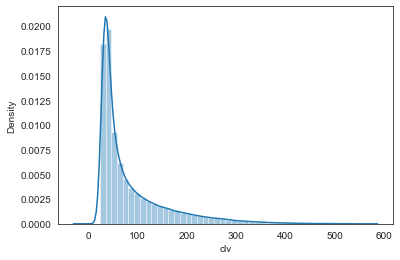

In [373]:
sns.distplot(clv_model['clv'],norm_hist=True)

In [374]:
clv_model['clv'].describe()

count    180311.000000
mean         84.433655
std          72.159065
min         -10.718223
25%          36.677847
50%          52.987879
75%         105.675201
max         567.946532
Name: clv, dtype: float64

In [375]:
# save file
clv_model.to_csv('clv.csv')